In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 34.5 MB/s eta 0:00:00


# Inference

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_seq2seq')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
# config['weights'] = './weights/transformerocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

File exists: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA


In [ ]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

Traceback (most recent call last):

unzip:  cannot find or open sample.zip, sample.zip.zip or sample.zip.ZIP.


In [ ]:
! ls sample | shuf |head -n 5

ls: cannot access 'sample': No such file or directory


'015208'

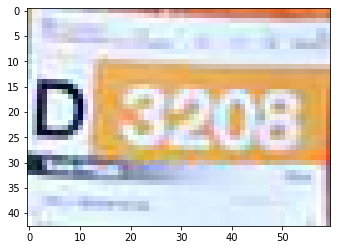

In [ ]:
img = './a.JPG'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [ ]:
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
61.2MB [00:00, 72.6MB/s]


In [ ]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
#config = Cfg.load_config_from_name('vgg_transformer')
config = Cfg.load_config_from_file('/content/config.yml')

In [ ]:
config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

dataset_params = {
    'name':'hw',
    'data_root':'/content/drive/MyDrive/Colab Notebooks/AIprj/img/output/',
    'train_annotation':'train.txt',
    'valid_annotation':'val.txt',
    'image_height':64
}

params = {
         'print_every':100,
         'valid_every':100,
          'iters':10000,
          'checkpoint':'/content/drive/MyDrive/Colab Notebooks/AIprj/checkpoint/transformerocr_checkpoint.pth',
          'export':'/content/drive/MyDrive/Colab Notebooks/AIprj/weights/transformerocr.pth',
          'metrics': 525,
          'batch_size': 16
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'
config['dataloader']['num_workers'] = 2
config['optimizer']['max_lr'] = 0.000003
config['pretrain'] = '/content/drive/MyDrive/Colab Notebooks/AIprj/weights/transformerocr.pth'
config['weights'] = '/content/drive/MyDrive/Colab Notebooks/AIprj/weights/transformerocr.pth'

you can change any of these params in this full list below

In [ ]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 2, 'pin_memory': True},
 'dataset': {'data_root': '/content/drive/MyDrive/Colab Notebooks/AIprj/img/output/',
  'image_height': 64,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train.txt',
  'valid_annotation': 'val.txt'},
 'device': 'cuda:0',
 'optimizer': {'max_lr': 3e-06, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': '/content/drive/MyDrive/Colab Notebooks/AIprj/weights/transformerocr.pth',
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 16,
  'checkpoint': '/content/drive/MyDrive/Colab Notebooks/AIprj/checkpoint/transformerocr_checkpoint.pth',
  'export': '/content/drive/MyDrive/Colab Notebooks/AIprj/weights/transformerocr.pth',


You should train model from our pretrained

In [ ]:
trainer = Trainer(config, pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 5235/5235 [00:00<00:00, 143141.44it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|██████████████████████████████████| 525/525 [00:00<00:00, 84426.41it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

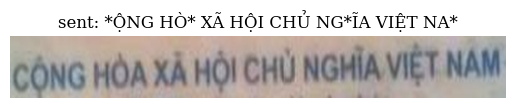

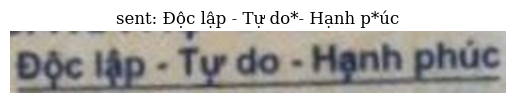

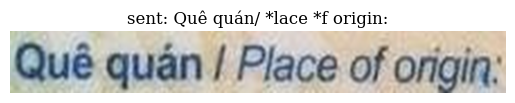

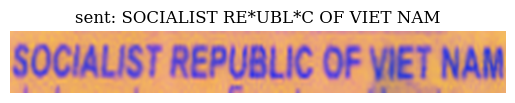

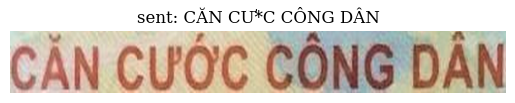

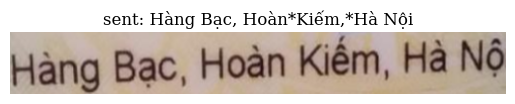

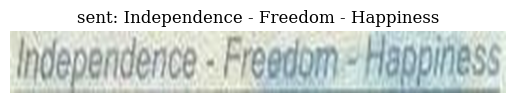

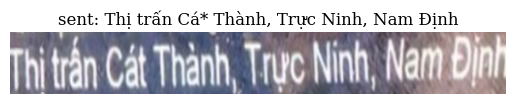

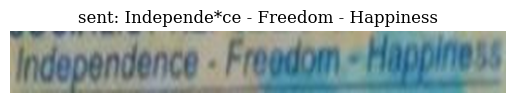

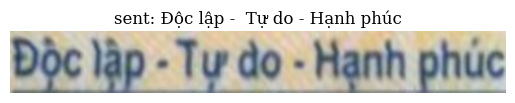

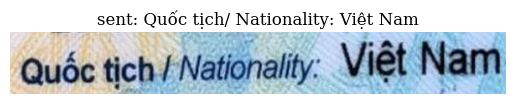

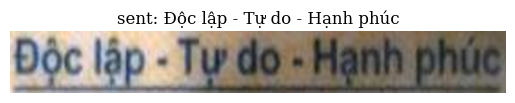

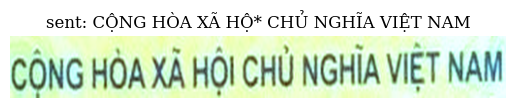

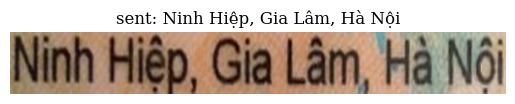

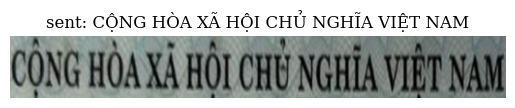

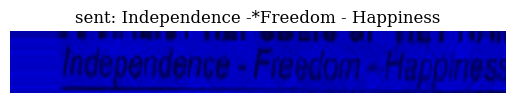

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()